# <p align="center">Monthly Sales Forecast</p>

---

## <p align="center">*1 - Exploratory Data Analysis & Pre-processing*</p>

---

### 👥 **Team Members**
- **Ana Farinha** *(Student Number: 20211514)*  
- **António Oliveira** *(Student Number: 20211595)*  
- **Mariana Neto** *(Student Number: 20211527)*  
- **Salvador Domingues** *(Student Number: 20240597)*  

📅 **Date:** *March 31, 2025*  
📍 **Prepared for:** *Siemens*  

**GitHub Repo:** 

---

In [37]:
# Data Handling Libraries
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
sales_data = pd.read_csv('./data/Case2_Sales data.csv', sep=";")
sales_data

,DATE,Mapped_GCK,Sales_EUR
0,01.10.2018,#1,0
1,02.10.2018,#1,0
2,03.10.2018,#1,0
3,04.10.2018,#1,0
4,05.10.2018,#1,0
...,...,...,...
9797,23.08.2019,#12,0
9798,23.08.2019,#36,1015
9799,12.08.2019,#12,0
9800,28.08.2019,#8,"43763,91"


In [39]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9802 entries, 0 to 9801
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   DATE        9802 non-null   object
 1   Mapped_GCK  9802 non-null   object
 2   Sales_EUR   9802 non-null   object
dtypes: object(3)
memory usage: 229.9+ KB


In [40]:
# Convert DATE column to datetime format
sales_data['DATE'] = pd.to_datetime(sales_data['DATE'], format='%d.%m.%Y')
# COnvert , to . in the sales column
sales_data['Sales_EUR'] = sales_data['Sales_EUR'].apply(lambda x: x.replace(',', '.')).astype(float)

In [41]:
sales_data.describe()

,DATE,Sales_EUR
count,9802,9.802000e+03
mean,2020-07-19 17:55:48.785961984,2.727857e+05
min,2018-10-01 00:00:00,-5.063812e+05
25%,2019-08-30 00:00:00,0.000000e+00
50%,2020-07-26 12:00:00,0.000000e+00
75%,2021-06-09 00:00:00,0.000000e+00
max,2022-04-30 00:00:00,4.112799e+07
std,NaN,2.230789e+06


In [55]:
# Unique product groups
sorted_arr = sorted(sales_data['Mapped_GCK'].unique(), key=lambda x: int(x[1:]))
print(sorted_arr)

['#1', '#3', '#4', '#5', '#6', '#8', '#9', '#11', '#12', '#13', '#14', '#16', '#20', '#36']


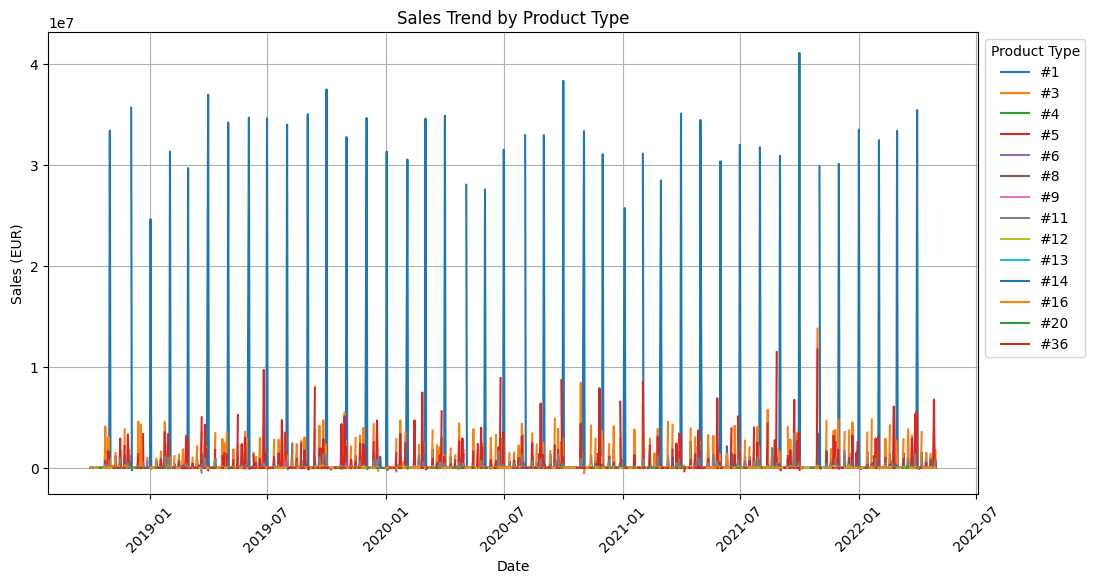

In [57]:
# Pivot, fill NaNs with 0
pivot_df = sales_data.pivot(index='DATE', columns='Mapped_GCK', values='Sales_EUR')

# Sort index (date)
pivot_df = pivot_df.sort_index()

# Plot
plt.figure(figsize=(12, 6))
for column in sorted_arr:
    plt.plot(pivot_df.index, pivot_df[column], label=str(column), marker='', linestyle='-')

plt.xlabel('Date')
plt.ylabel('Sales (EUR)')
plt.title('Sales Trend by Product Type')
plt.legend(title='Product Type', loc='upper left', bbox_to_anchor=(1, 1))  # Move legend outside
plt.grid(True)
plt.xticks(rotation=45)

plt.show()
